<a href="https://colab.research.google.com/github/sunmoan/AIFFEL_quest_rs/blob/main/Mainquest/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

import numpy as np

In [60]:
X = np.array(df_X)
print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [61]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
W = np.random.rand(X_train.shape[1])
n = np.random.rand()

print(len(W))

10


In [64]:
def model(X,W,b):
  predictions = 0
  for i in range(len(W)):
    predictions += X[:, i]*W[i]
  predictions += b
  return predictions

In [65]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [66]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [67]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [68]:
LEARNING_RATE = 0.001

In [69]:
%%timeit -n 1 -r 1
global W, b

b = 0 # Initialize b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, Y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, Y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21896.3823
Iteration 200 : Loss 16662.4422
Iteration 300 : Loss 13152.8583
Iteration 400 : Loss 10798.6839
Iteration 500 : Loss 9218.6975
Iteration 600 : Loss 8157.4622
Iteration 700 : Loss 7443.8232
Iteration 800 : Loss 6963.0985
Iteration 900 : Loss 6638.4455
Iteration 1000 : Loss 6418.3762
197 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [70]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, Y_test)
mse


np.float64(5385.425032356111)

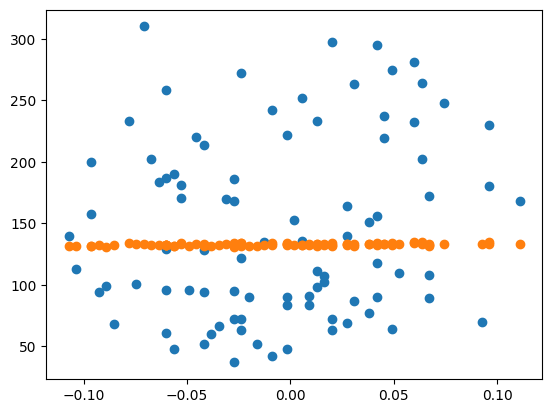

In [71]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], Y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()